In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
f(3.0)

20.0

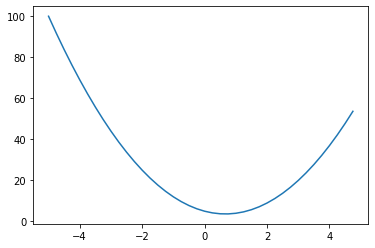

In [5]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys);

In [6]:
h = 0.000001
x = 2/3
delx = (f(x+h)-f(x))/h

def lin(x, m, b):
    return m*x+b

tarngetxs = np.arange(x-2, x+2, 0.25)
tangent_line = lin(tarngetxs, delx, 0)
delx

2.999378523327323e-06

In [7]:
f(x)

3.666666666666667

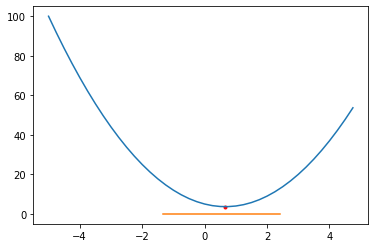

In [8]:
plt.plot(xs, ys)
plt.plot(tarngetxs, tangent_line)
plt.scatter(x, f(x), c='red', s=9);

In [9]:
a = 2
b = -3
c = 10
d = a*b+c
d

4

In [10]:
h = 0.0001
a = 2
b = -3
c = 10
d1 = a*b+c
c += h
d2 = a*b+c
slope_wth_c = (d2-d1)/h
print('d1', d1)
print('d2', d2)
print('slope_wth_c', slope_wth_c)

d1 4
d2 4.0001
slope_wth_c 0.9999999999976694


In [11]:
class Value:
    def __init__(self, data, children=(), op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(children)
        self._op = op
        self._label = label
        self._backward = lambda:None
    
    def __repr__(self):
        return f'Value=(data={self.data})'
        
    def __add__(self, other):
        out = Value(self.data+other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0*out.grad
            other.grad += 1.0*out.grad
        out._backward = _backward
        return out
        
    def __mul__(self, other):
        out = Value(self.data*other.data, (self, other), '*')
        def _backward():
            self.grad += other.data*out.grad
            other.grad += self.data*out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1-t**2)*out.g
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visted = set()
        def build_topo(node):
            if node not in visted:
                visted.add(node)
                for child in node._prev:
                    build_topo(child)
                topo.append(node)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [12]:
a = Value(2., label='a')
b = Value(-3, label='b')
c = Value(10, label='c')
e = a*b; e.lable = 'e'
d = e+c;d.label='d'
f = Value(-2, label='f')
L = d*f; L.label='L'
L

Value=(data=-8.0)

In [13]:
L.backward()

In [14]:
def trace(root):
    nodes,edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes,edges

In [15]:
from graphviz import Digraph

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes,edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label=f"{n._label} | data {n.data:.4f} | grad {n.grad:.4f}", shape='record')
        if n._op:
            dot.node(name=uid+n._op, label=n._op)
            dot.edge(uid+n._op, uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

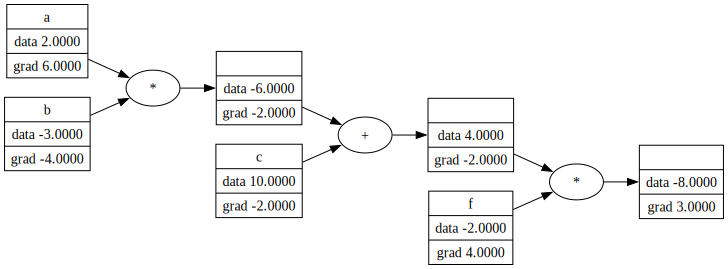

In [18]:
draw_dot(L)